## 27일차 강의 (2021.8.10)
# 신경망

### 연습문제
1. 행복데이터의 주요 6개 속성으로 행복지수를 예측하려고 한다. 64개의 노드와 128개의 노드로 된 중간층을 가진 신경망을 구성하고, 최종 출력값을 계산하시오.

2. 유방암데이터로 악성/양성을 분류하려고 한다. 128개와 256개의 노드로 구성된 중간층을 가지고, 1개의 노드로 된 출력층을 가지는 신경망을 구성하고, 최종 출력값을 계산하시오.

> - 가중치와 절편 값은 임의로 초기화한다.
> - 활성화함수(시그모이드함수) 는 적절히 적용한다.

3. 위의 계산결과를 가지고 오차값을 계산해 보시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
happy = pd.read_csv('world_happiness_report_2021.csv')
happy

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [3]:
X = happy.iloc[:, 6:12].values
y = happy['Ladder score'].values
X.shape, y.shape

((149, 6), (149,))

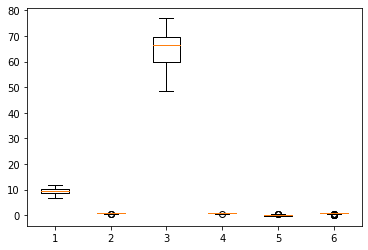

In [5]:
plt.boxplot(X); pass

In [6]:
X_norm = (X-X.mean(axis=0))/X.std(axis=0)
X_norm.shape

(149, 6)

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
W1 = np.random.randn(6,64)/10
b1 = np.random.randn(64)/10

y1 = sigmoid(X_norm@W1 + b1)
y1.shape

(149, 64)

In [12]:
W2 = np.random.randn(64,128)/10
b2 = np.random.randn(128)/10

y2 = sigmoid(y1@W2 + b2)
y2.shape

(149, 128)

In [19]:
W3 = np.random.randn(128,1)/10
b3 = np.random.randn(1)/10

pred_y = y2@W3 + b3
pred_y.shape

(149, 1)

In [20]:
y.shape

(149,)

In [21]:
pred_y = pred_y.ravel()
pred_y.shape

(149,)

In [22]:
mse = ((y-pred_y)**2).mean()
mse

21.560466356430208

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [24]:
X = cancer.data
y = cancer.target

X.shape, y.shape

((569, 30), (569,))

In [25]:
X_norm = (X- X.mean(axis=0))/X.std(axis=0)
X_norm.shape

(569, 30)

In [26]:
W1 = np.random.randn(30,128)/10
b1 = np.random.randn(128)/10

y1 = sigmoid(X_norm@W1 + b1)
y1.shape

(569, 128)

In [27]:
W2 = np.random.randn(128,256)/10
b2 = np.random.randn(256)/10

y2 = sigmoid(y1@W2 + b2)
y2.shape

(569, 256)

In [28]:
W3 = np.random.randn(256,1)/10
b3 = np.random.randn(1)/10

pred_y = sigmoid(y2@W3 + b3)
pred_y.shape

(569, 1)

In [29]:
pred_y = pred_y.ravel()

In [31]:
y[0], pred_y[0]

(0, 0.7268100207209767)

In [32]:
-np.log(1-pred_y[0])

1.297587831024728

In [34]:
entropy = 0
for i in range(569):
    if y[i]==1:
        entropy += -np.log(pred_y[i])
    else:
        entropy += -np.log(1-pred_y[i])
        
entropy /= 569
entropy

0.6832426731941278

In [36]:
entropy = (-y*np.log(pred_y)-(1-y)*np.log(1-pred_y)).mean()
entropy

0.6832426731941283